In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import sys
import os
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
root_dir = "/content/drive/MyDrive/FYP/Code/Emotion-1903/datasets/Video"
actor_files = os.listdir(root_dir)

In [ ]:
os.listdir(root_dir)

['Actor_07',
 'Actor_16',
 'Actor_02',
 'Actor_24',
 'Actor_03',
 'Actor_22',
 'Actor_19',
 'Actor_17',
 'Actor_18',
 'Actor_06',
 'Actor_05',
 'Actor_08',
 'Actor_12',
 'Actor_11',
 'Actor_14',
 'Actor_10',
 'Actor_13',
 'Actor_21',
 'Actor_23',
 'Actor_04',
 'Actor_09',
 'Actor_15',
 'Actor_20',
 'Actor_01']

In [ ]:
len(os.listdir(root_dir))

24

In [ ]:
mp_face_detection = mp.solutions.face_detection
num_frames = 6
frame_size = (64,64)
features = []

In [ ]:
for num,actor in enumerate(actor_files[0:1]):

    for k,video_file in enumerate(os.listdir(os.path.join(root_dir,actor))):
        video_features = []
        print(f"Actor : {num}, File : {k}")
        cap = cv2.VideoCapture(os.path.join(root_dir,actor,video_file))
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_array = np.linspace(0,total_frames-1,num_frames+1,dtype = int)

        with mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:

            for i in frame_array:
                cap.set(cv2.CAP_PROP_POS_FRAMES,i)
                ret, frame = cap.read()

                if not ret:
                    continue

                rgb_frame = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)

                detection_results = face_detection.process(rgb_frame)

                if detection_results.detections:
                    for j,detection in enumerate(detection_results.detections):
                        bboxC = detection.location_data.relative_bounding_box
                        ih,iw, _ = frame.shape
                        x,y,w,h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                        face_region = np.array(frame[y:y + h,x:x + w])
                        face_region = cv2.resize(face_region, frame_size)
                        face_region = cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB)
                        video_features.append(face_region)
        features.append(video_features)
        cap.release()



Actor : 0, File : 0
Actor : 0, File : 1
Actor : 0, File : 2
Actor : 0, File : 3
Actor : 0, File : 4
Actor : 0, File : 5
Actor : 0, File : 6
Actor : 0, File : 7
Actor : 0, File : 8
Actor : 0, File : 9
Actor : 0, File : 10
Actor : 0, File : 11
Actor : 0, File : 12
Actor : 0, File : 13
Actor : 0, File : 14
Actor : 0, File : 15
Actor : 0, File : 16
Actor : 0, File : 17
Actor : 0, File : 18
Actor : 0, File : 19
Actor : 0, File : 20
Actor : 0, File : 21
Actor : 0, File : 22
Actor : 0, File : 23
Actor : 0, File : 24
Actor : 0, File : 25
Actor : 0, File : 26
Actor : 0, File : 27
Actor : 0, File : 28
Actor : 0, File : 29
Actor : 0, File : 30
Actor : 0, File : 31
Actor : 0, File : 32
Actor : 0, File : 33
Actor : 0, File : 34
Actor : 0, File : 35
Actor : 0, File : 36
Actor : 0, File : 37
Actor : 0, File : 38
Actor : 0, File : 39
Actor : 0, File : 40
Actor : 0, File : 41


In [ ]:
incorrect_indices = []
expected_shape = (6, 64, 64, 3)

for i, element in enumerate(features):
    if np.shape(element) != expected_shape:
        features[i] = features[i][:6]

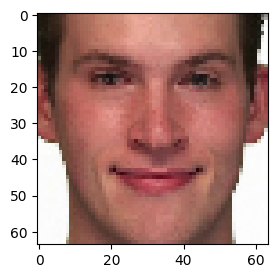

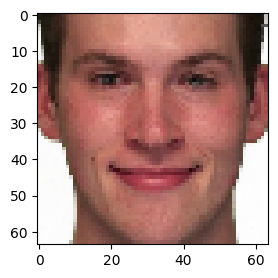

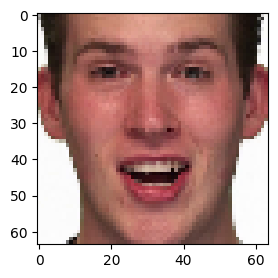

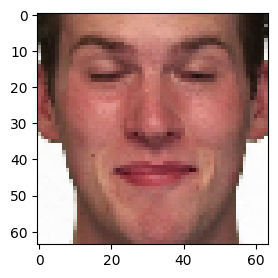

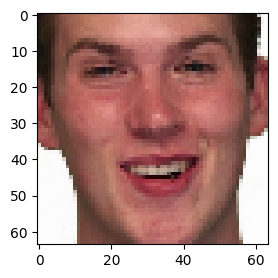

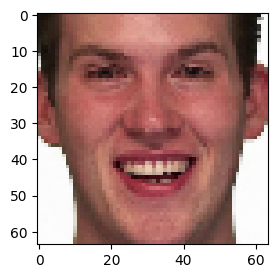

In [ ]:
for i in range(6):
    plt.figure(figsize = (3,3))
    plt.imshow(features[18][i])
    plt.show()

In [ ]:
np.save("video_feature",features)